# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
data = pd.read_csv('../data/coffee_cleaned.csv')
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,1,2023-01-01,0 days 07:06:11,5,Lower Manhattan,32,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6
1,2,2023-01-01,0 days 07:08:56,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6
2,3,2023-01-01,0 days 07:14:04,5,Lower Manhattan,59,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6
3,4,2023-01-01,0 days 07:20:24,5,Lower Manhattan,22,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6
4,5,2023-01-01,0 days 07:22:41,5,Lower Manhattan,57,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6


In [11]:
data.shape

(149116, 18)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [13]:
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

<class 'pandas.core.series.Series'>


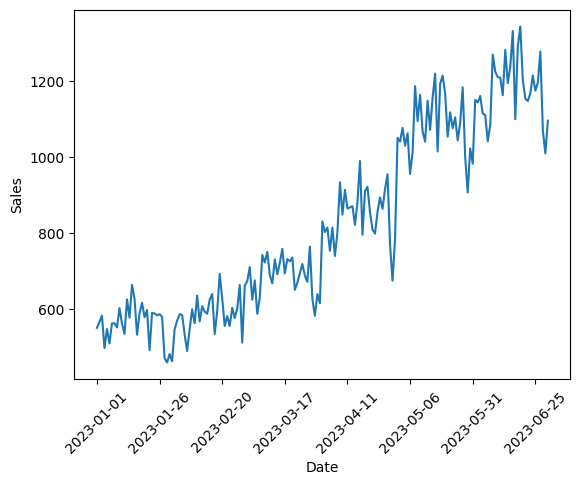

In [39]:
daily_sales = data.groupby(data['transaction_date']).size()

print(type(daily_sales))

fig, ax = plt.subplots()
daily_sales.plot(rot=45)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.show()